## Import statments

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

# Main.py 

## Import and sort DataFrame

In [15]:
# Load CSV
df = pd.read_csv("../Data/final_df.csv", index_col=0)  # Ensure samples are the index

# Reset index to move sample names into a column
df = df.reset_index().rename(columns={"index": "Sample"})  # Rename the new column

# Define non-SNP columns
non_snp_columns = ["Sample", "Population", "Super_population", "Group"]


# Drop non-SNP columns before PCA
df_snps = df.drop(columns=non_snp_columns, errors='ignore')

# Ensure all values are numeric
df_snps = df_snps.apply(pd.to_numeric)

## Using PCA for data analysis

In [16]:
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix


(1092, 663)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [17]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [18]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.29842005 0.12632966]
[126.14005582  82.07137044]


In [19]:
to_plot = pca.transform(matrix)
print(matrix)
to_plot.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 2 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 0]]


(1092, 2)

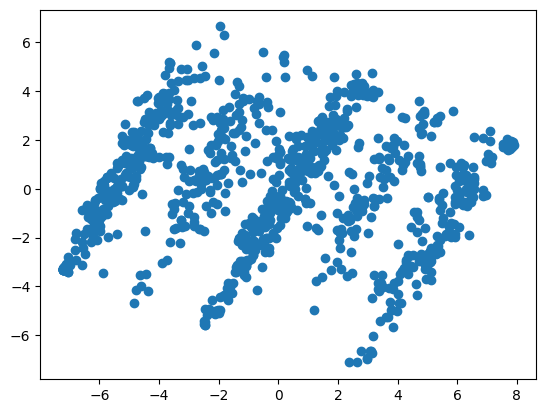

In [20]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

## Using altair package for data visualization

In [21]:
import altair as alt

In [22]:
df_plot = df[non_snp_columns].copy()
df_plot

,Sample,Population,Super_population,Group
0,HG00096,GBR,EUR,High
1,HG00097,GBR,EUR,High
2,HG00099,GBR,EUR,High
3,HG00100,GBR,EUR,High
4,HG00101,GBR,EUR,High
...,...,...,...,...
1087,NA20816,TSI,EUR,High
1088,NA20818,TSI,EUR,High
1089,NA20819,TSI,EUR,High
1090,NA20826,TSI,EUR,High


In [23]:
df_plot["PC1"] = to_plot[:, 0]
df_plot["PC2"] = to_plot[:, 1]
df_plot

,Sample,Population,Super_population,Group,PC1,PC2
0,HG00096,GBR,EUR,High,-3.865770,3.897277
1,HG00097,GBR,EUR,High,4.885261,-2.940449
2,HG00099,GBR,EUR,High,4.770986,2.229943
3,HG00100,GBR,EUR,High,-2.296147,-0.150202
4,HG00101,GBR,EUR,High,3.707866,-4.063529
...,...,...,...,...,...,...
1087,NA20816,TSI,EUR,High,3.147513,4.755280
1088,NA20818,TSI,EUR,High,1.679296,2.090988
1089,NA20819,TSI,EUR,High,-4.700234,3.607069
1090,NA20826,TSI,EUR,High,2.055208,2.646217


In [24]:
alt.Chart(df_plot).mark_point().encode(
    x=alt.X("PC1", title="Principal Component 1 (PC1)"),
    y=alt.Y("PC2", title="Principal Component 2 (PC2)"),
    color=alt.Color("Super_population", scale=alt.Scale(scheme="tableau10"))).properties(
    title="PCA of Genetic Data by Super Population")

alt.Chart(...)

## Allele frequency per sample

In [28]:
allele_df = pd.read_csv("../Data/variant_frequency_df.csv")
allele_df.head()


,Unnamed: 0,Sample,Allele_frequency,Super_population,Group
0,0,HG00096,0.056561,EUR,High
1,1,HG00097,0.085219,EUR,High
2,2,HG00099,0.099548,EUR,High
3,3,HG00100,0.061840,EUR,High
4,4,HG00101,0.081448,EUR,High


In [36]:
# Load the allele frequency data correctly
allele_df = pd.read_csv("../Data/variant_frequency_df.csv", index_col=0)  # Fix extra column issue

# Ensure Super_population column is categorical
allele_df["Super_population"] = allele_df["Super_population"].astype(str)

# Create Bar Chart
bar_chart = alt.Chart(allele_df).mark_bar().encode(
    x=alt.X("Super_population:N", title="Super Population"),  # Categorical X-axis
    y=alt.Y("mean(Allele_frequency):Q", title="Mean Allele Frequency"),  # Aggregate mean allele frequency
    color=alt.Color("Super_population", scale=alt.Scale(scheme="tableau10")),  # Different colors per population
).properties(
    title="Mean Allele Frequency Across Super Populations"
)

bar_chart

alt.Chart(...)

In [41]:
# Load the allele frequency data correctly
allele_df = pd.read_csv("../Data/variant_frequency_df.csv", index_col=0)  # Fix extra column issue

# Ensure Super_population column is categorical
allele_df["Super_population"] = allele_df["Group"].astype(str)

# Create Bar Chart
bar_chart = alt.Chart(allele_df).mark_bar().encode(
    x=alt.X("Group:N", title="Groups"),  # Categorical X-axis
    y=alt.Y("mean(Allele_frequency):Q", title="Mean Allele Frequency"),  # Aggregate mean allele frequency
    color=alt.Color("Group", scale=alt.Scale(scheme="tableau10"))).properties(
    title="Mean Allele Frequency Across Groups"
)

bar_chart

alt.Chart(...)

## Statistical analysis

### Kolmogorov-Smirnov (KS) normality test

### Kruskal-Wallis test

In [ ]:
from scipy.stats import kstest, kruskal

allele_frequencies = allele_df["Allele_frequency"].dropna()

# Perform KS test against normal distribution (using sample mean & std)
ks_stat, p_value = kstest(allele_frequencies, "norm", args=(allele_frequencies.mean(), allele_frequencies.std()))

print(f"KS Statistic: {ks_stat:.4f}, p-value= {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Data is NOT normally distributed (reject H0).")
else:
    print("Data may be normally distributed (fail to reject H0).")



KS Statistic: 0.0546, p-value= 0.0029
Data is NOT normally distributed (reject H0).


This shows thrat the dat is not normally distributed.

In [48]:

# Group allele frequencies by super-population
grouped_data = [allele_df[allele_df["Group"] == pop]["Allele_frequency"].dropna()
                for pop in allele_df["Group"].unique()]

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(*grouped_data)

print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in allele frequencies among super-populations.")
else:
    print("No significant difference in allele frequencies among super-populations.")

Kruskal-Wallis H-statistic: 0.6886, p-value: 0.4066
No significant difference in allele frequencies among super-populations.


This shows that there is no statistical significant difference between allele frequencies among super_population

## Exon analysis

In [49]:
import sys
sys.path.append("/Users/alexandrebatista/Desktop/VS_code/First_project/")

# Now import the script as a module (without .py)
from allele_frequencies_per_exon import grouped_bar_chart

# Display the chart
grouped_bar_chart.display()

alt.Chart(...)

No statistical significance was found between the high and low groups.